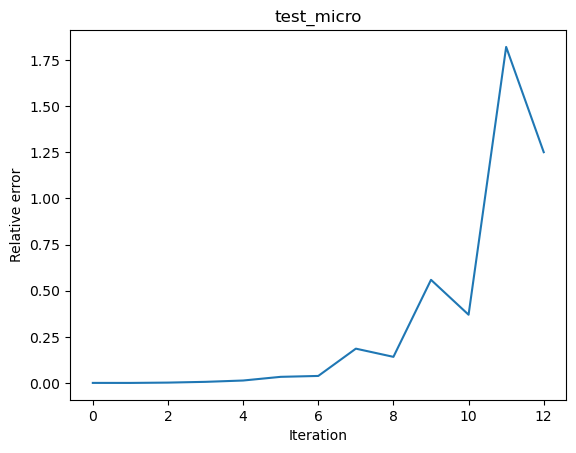

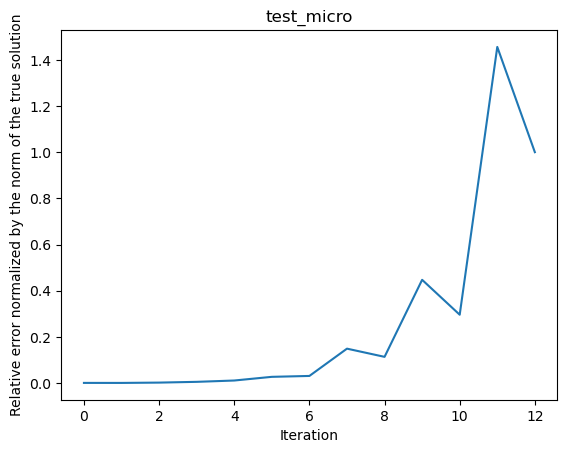

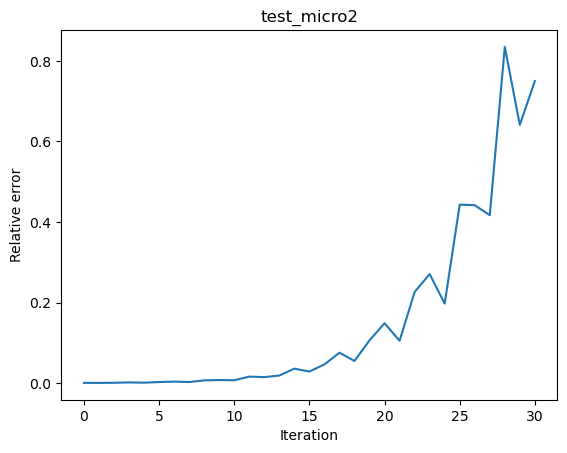

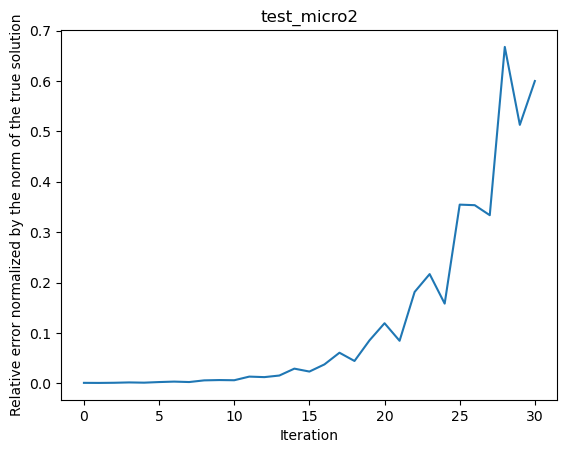

In [2]:
import os
import matplotlib.pyplot as plt

path = "build/benchmarks/"

tests = ["test_micro","test_micro2"]

for test in tests:
    truesol = path + test + "/gold.txt"

    with open(truesol) as f:
        truesol = f.readlines()

    truesol = [float(x) for x in truesol]

    # get the iterates, all the files starting with iter_

    iterates = [f for f in os.listdir(path + test) if f.startswith("iter_")]
    hist = []
    for i in iterates:
        with open(path + test + "/" + i) as f:
            iter = f.readlines()

        iter = [float(x) for x in iter]
        hist.append(iter)

    # now we have the true solution and the iterates

    # compute the error in norm 2
    rel_error = []
    for i in hist:
        rel_error.append(sum([(x-y)**2 for x,y in zip(i,truesol)])**0.5)

    # compute the relative error normalized by the norm of the true solution
    # plot the relative error

    plt.plot(rel_error)
    plt.xlabel("Iteration")
    plt.ylabel("Relative error")
    plt.title(test)
    plt.show()

    # normalize the error with the norm of the true solution

    norm_truesol = sum([x**2 for x in truesol])**0.5
    rel_error = [x/norm_truesol for x in rel_error]

    plt.plot(rel_error)
    plt.xlabel("Iteration")
    plt.ylabel("Relative error normalized by the norm of the true solution")
    plt.title(test)
    plt.show()

